# RDKit을 활용한 분자 구조 분석

In [58]:
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import Draw

    
root = '/home/jhyang/WORKSPACES/DATA/polymers/f-polymer/'
df = pd.read_csv(os.path.join(root, 'f-polymer-20220603.csv'), index_col=0)
df = pd.read_csv(os.path.join(root, 'f-polymer-20220922.csv'), index_col=0)
df = pd.read_csv(os.path.join(root, 'dsc.csv'), index_col=0)

In [70]:
pairings = {k:set(v) for k,v in pairings.items() if 'Did' not in k}
pairings

{'CC(=C)C(=O)OCC(F)(F)C(F)(F)F': {'CC(=C)C(=O)OCC(C(F)(F)F)(F)F'},
 'CNC(=O)C(C)=C': {'CC(=C)C(=O)NC'},
 'OC(=O)C=C': {'C=CC(=O)O'},
 '[O-]C(=O)C(=C)C(F)(F)F': {'C=C(C(=O)O)C(F)(F)F'}}

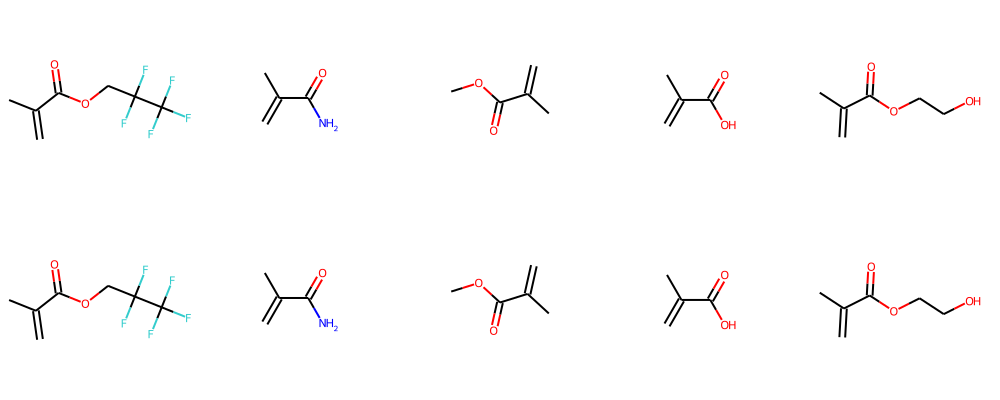

In [62]:
ms = []
for s in data['FA-00169'].smiles:
    ms.append(Chem.MolFromSmiles(s))
Draw.MolsToGridImage(ms, molsPerRow=5)
for s in data['FA-00170'].smiles:
    ms.append(Chem.MolFromSmiles(s))
Draw.MolsToGridImage(ms, molsPerRow=5)

In [ ]:
ims = []
for s1, s2 in pairings.items():
    m1 = Chem.MolFromSmiles(s1)
    m2 = Chem.MolFromSmiles(list(s2)[0])
    im = Draw.MolsToGridImage([m1, m2])
    ims.append(im)

In [3]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles_all = sorted(set(df2[[f'SMILES_{x}' for x in 'ABCDE']].values.reshape(-1).tolist()))
ms = [Chem.MolFromSmiles(s) for s in smiles_all]

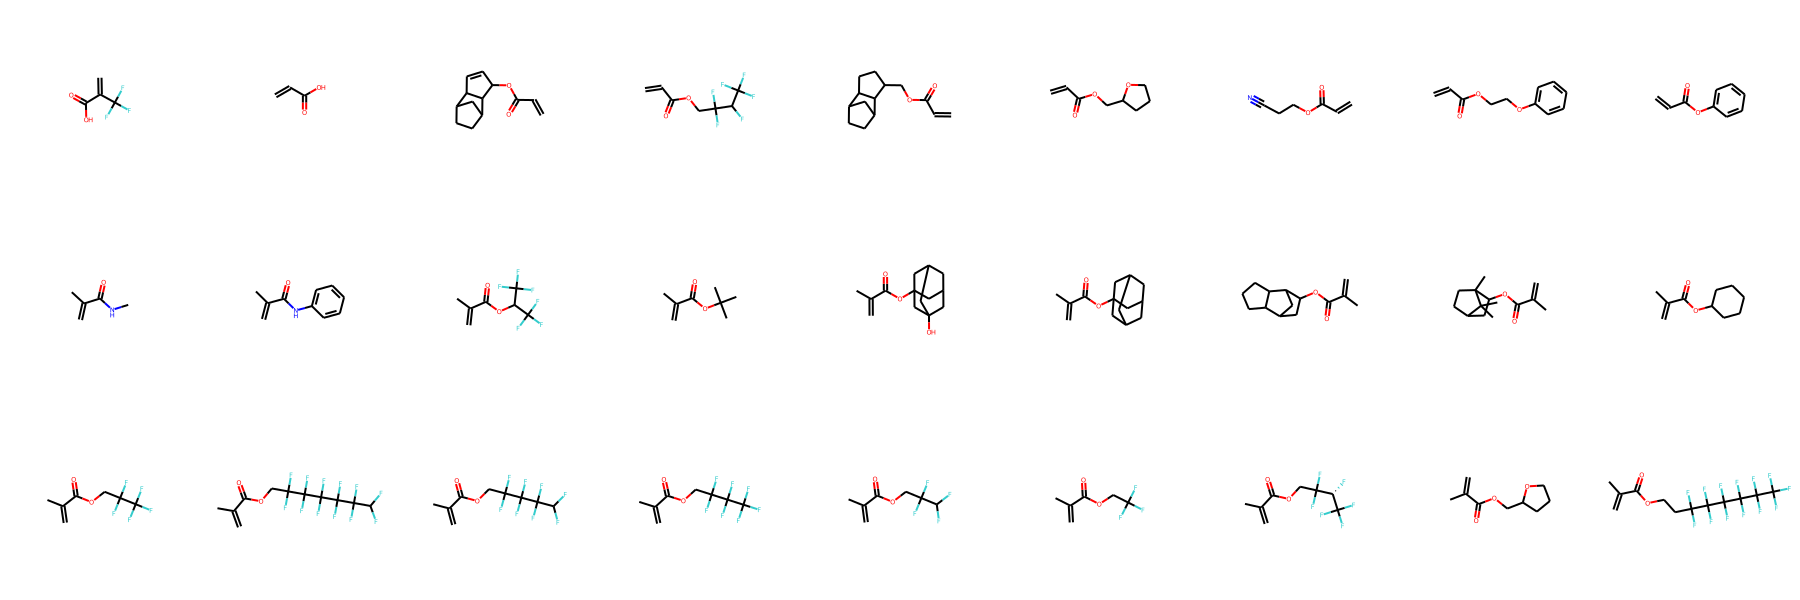

In [18]:
Draw.MolsToGridImage(ms[:27], molsPerRow=9)

## monomer mapping

In [215]:
smiles = {x:eval(f'df2.SMILES_{x}[df2.FR_{x} != 0].drop_duplicates().values') for x in 'ABCDE'}

In [229]:
mapper = {}
for k, ks in smiles.items():
    i = 1
    for s in ks:
        if s not in mapper.keys():
            mapper[s] = f'{k}-{i:02d}'
            i += 1
len(mapper), mapper

(57,
 {'C=CC(=O)OCC(C(C(F)(F)F)F)(F)F': 'A-01',
  'CC(=C)C(=O)OC(C(F)(F)F)C(F)(F)F': 'A-02',
  'CC(=C)C(=O)OCC(C(F)(F)F)(F)F': 'A-03',
  'CC(=C)C(=O)OCC(F)(F)[C@H](F)C(F)(F)F': 'A-04',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)F': 'A-05',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F': 'A-06',
  'CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)F': 'A-07',
  'CC(=C)C(=O)OCC(F)(F)C(F)F': 'A-08',
  'CC(=C)C(=O)OCC(F)(F)F': 'A-09',
  'CC(=C)C(=O)OCc1c(c(c(c(c1F)F)F)F)F': 'A-10',
  'CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F': 'A-11',
  'CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F': 'A-12',
  'COC(=O)C(C)=C': 'A-13',
  'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C': 'A-14',
  'FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C': 'A-15',
  'FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C': 'A-16',
  'FC(F)(F)C(F)(F)COC(=O)C=C': 'A-17',
  'FC(F)(F)C(OC(=O)C=C)C(F)(F)F': 'A-18',
  'FC(F)(F)COC(=O)C=C': 'A-19',
  'CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C': 'B-01',
  'CC(=C)C(=O)OC12CC3CC(C1)CC(C3)C2': 'B-02'

In [230]:
for k1, v1 in smiles.items():
    for k2, v2 in smiles.items():
        if 'ABCDE'.index(k1) >= 'ABCDE'.index(k2): continue
        for s1 in v1:
            for s2 in v2:
                if s1 != s2: continue
                print('{} / {} : {}'.format(k1, k2, s1))

A / B : CC(=C)C(=O)OC(C(F)(F)F)C(F)(F)F
A / B : CC(=C)C(=O)OCC(F)(F)[C@H](F)C(F)(F)F
A / B : CC(=C)C(=O)OCC(F)(F)C(F)(F)C(F)(F)C(F)F
A / B : CC(=C)C(=O)OCC(F)(F)C(F)F
A / B : CC(=C)C(=O)OCC(F)(F)F
A / B : CC(=C)C(=O)OCc1c(c(c(c(c1F)F)F)F)F
A / B : CC(=C)C(=O)OCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F
A / B : FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCOC(=O)C=C
A / B : FC(F)(F)C(F)(F)C(F)(F)COC(=O)C=C
A / B : FC(F)(F)COC(=O)C=C
A / C : COC(=O)C(C)=C
B / C : CCCCCCCCCCCCCCCCCCOC(=O)C(C)=C
B / C : CCCCOC(=O)C(C)=C
B / C : CCOC(=O)C(C)=C
B / C : COC(=O)C=C
B / E : CC(=C)C(=O)OC12CC3CC(C1)CC(C3)(C2)O


In [ ]:

for i, row in part.iterrows():
    w_sum = np.sum([eval(f'row.FR_{x}') for x in 'ABCDE'])
    eqn = ''
    for x in 'ABCDE':
        sim = mapper[eval(f'row.SMILES_{x}')]
        val = eval(f'row.FR_{x}')/w_sum
        eqn += ' {:5.3f} * {} +'.format(val, sim)
    eqn = eqn[:-1] + ' = {:6.4f}'.format(row.Target)
    print(eqn)
        
        
    

# Model loading test

In [1]:
%load_ext autoreload
%autoreload 2
from utils.dataset import MoleculeDataset, data_augmentation, to_tensor, to_numpy, collate_fn, fpoly_collate_fn

import numpy as np
import torch
import pandas as pd

/home/jhyang/anaconda3/envs/fpoly/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = MoleculeDataset()
dataset.generate_fpoly('./dataset/fpolymers.csv')

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [13]:
from utils.data import train_test_split
d_train_, d_test = train_test_split(dataset, train_ratio=0.8)
d_train, d_valid = train_test_split(d_train_, train_ratio=0.9)
len(d_train), len(d_valid), len(d_test)

(184, 21, 52)

In [29]:
184 / 32

5.75

In [14]:
qm9_feats, _, _ = collate_fn(dataset.data.reshape(-1)[:2], device='cuda')
poly_feats, tgts, ids = fpoly_collate_fn(dataset.data[:2], device='cuda')

In [5]:
encoder_params={
    'graph_net_params':{
         'node_dim':26,
         'edge_dim':5,
         'output_dim':64,
         'hidden_dim':128,
         'n_layer':3               
    },
    'mol_net_params':{
         'input_dim':399,
         'output_dim':64,
         'hidden_dim':256,
         'n_layer':2
    },
}
decoder_params={
    'output_dim':1,
    'hidden_dim':256,
    'n_layer':1
}

In [22]:
from model.models import MultiHeadModel, SingleModel, LinearDecoder
from torch.utils.tensorboard import SummaryWriter
import os

root = './test/concat_mul_share'
os.makedirs(root, exist_ok=True)
writer = SummaryWriter(root)

model = MultiHeadModel(encoder_type='concat',
               encoder_params=encoder_params, decoder_params=decoder_params, shared=True).cuda()

#model = SingleModel(encoder_type='graph', 
#                    encoder_params=encoder_params, decoder_params=decoder_params).cuda()

model.eval()
with torch.no_grad():
#    writer.add_graph(model, ((v for v in feats[f'mol_{x}'].values()) for x in 'ABCDE'))
    writer.add_graph(model, [v for v in poly_feats.values()])
#    writer.add_graph(model, [v for v in qm9_feats.values()])

In [238]:
model = LinearDecoder({'input_dim':5,'output_dim':1,'hidden_dim':20,'n_layer':3})

root = './test/test'
os.makedirs(root, exist_ok=True)
writer = SummaryWriter(root)

model.eval()
with torch.no_grad():
    writer.add_graph(model, torch.rand(20).view(-1,5))
#model

In [164]:
[[v for v in feats[f'mol_{x}'].values()] for x in 'ABCDE']

[[tensor([[12.0110,  1.0000,  3.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  3.0000,  0.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  1.0000,  2.0000,  ...,  0.0000,  0.0000,  3.3164],
          ...,
          [15.9990,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  4.0108],
          [12.0110,  2.0000,  1.0000,  ...,  0.0000,  0.0000,  3.3164],
          [12.0110,  1.0000,  2.0000,  ...,  0.0000,  0.0000,  3.3164]],
         device='cuda:0'),
  tensor([[1., 1., 0., 0., 0.],
          [1., 1., 0., 0., 0.],
          [2., 2., 0., 1., 0.],
          ...,
          [1., 1., 0., 1., 1.],
          [2., 2., 0., 1., 0.],
          [2., 2., 0., 1., 0.]], device='cuda:0'),
  tensor([[   0,    1,    1,  ..., 4027, 4027, 4028],
          [   1,    0,    2,  ..., 4025, 4028, 4027]], device='cuda:0'),
  tensor([[11.3725, -4.4672, 11.3725,  ...,  2.3930,  0.0000,  0.0000],
          [11.3725, -4.4672, 11.3725,  ...,  2.3930,  0.0000,  0.0000],
          [13.1195, -2.2639,

In [144]:
before_train = {k:v.cpu().numpy() for k,v in model.state_dict().items()}
crit = torch.nn.MSELoss()
opt = torch.optim.AdamW(model.parameters(), lr=1e-2)

model.train()
losses = []
for i in range(500):
    
    out = model(**feats)
    loss = crit(out, tgts)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    losses.append(loss.cpu().item())

after_train = {k:v.cpu().numpy() for k,v in model.state_dict().items()} 

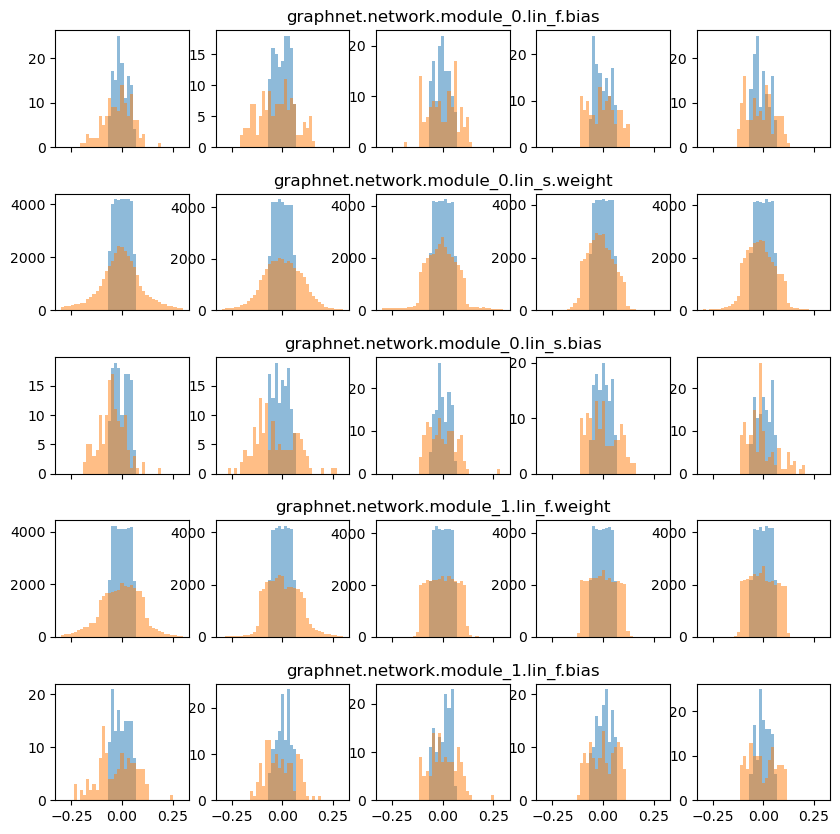

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

keys = [k.replace('encoder_A.','') for k in before_train.keys() if 'encoder_A' in k]

i_base = 3
f, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axs):
    key = keys[i_base + i]
    ax[2].set_title(key)
    for j, x in enumerate('ABCDE'):
        ax[j].hist(before_train[f'encoder_{x}.{key}'].reshape(-1), alpha=0.5, bins=np.linspace(-0.3,0.3,40))
        ax[j].hist(after_train[f'encoder_{x}.{key}'].reshape(-1), alpha=0.5, bins=np.linspace(-0.3,0.3,40))
plt.subplots_adjust(hspace=0.4)

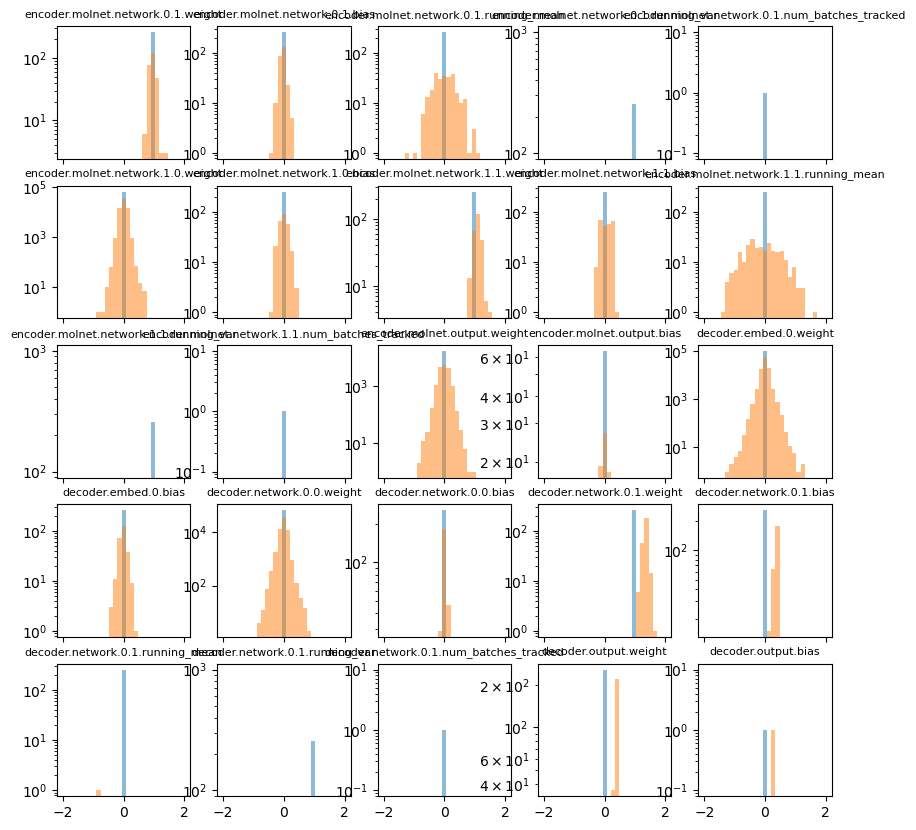

In [142]:
keys = list(before_train.keys())

f, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True)
i_base = 25
for i, ax in enumerate(axs.reshape(-1)):
    key = keys[i_base + i]
    ax.set_title(key, fontsize=8)
    ax.hist(before_train[key].reshape(-1), alpha=0.5, bins=np.linspace(-2,2,30))
    ax.hist(after_train[key].reshape(-1), alpha=0.5, bins=np.linspace(-2,2,30))
    ax.set_yscale('log')


# Parameter 생성

In [2]:
import json, os

param = json.load(open('./ft_params/base.json'))

graphs  = ['cg','tf']
readout = ['add','max']
shared  = [ True, False]
types   = ['concat','graph','mol','ssib']

for t in types:
    for s in shared:
        ss = 'sing' if s else 'mult'
        for r in readout:
            for g in graphs:
                p = param.copy()
                if t == 'mol':
                    g = 'dnn'
#                    pt_idx = '03'
                    pt_idx = '01'
                if t == 'graph' and g == 'cg':
#                    pt_idx = '02'
                    pt_idx = '03'
                if t == 'graph' and g == 'tf':
#                    pt_idx = '00'
                    pt_idx = '03'
                if t == 'concat' and g == 'cg':
#                    pt_idx = '00'
                    pt_idx = '00'
                if t == 'concat' and g == 'tf':
#                    pt_idx = '03'
                    pt_idx = '03'
                if t == 'ssib' and g == 'cg':
#                    pt_idx = '02'
                    pt_idx = '02'
                if t == 'ssib' and g == 'tf':
#                    pt_idx = '00'
                    pt_idx = '00'
                tag = f'{ss}_{r}_{g}'
                p.update({
                    'tag': tag,
                    'encoder_type': t,
                    'encoder_share': s,
                    'encoder_readout': r,
#                    'pretrained_path': f'/home/jhyang/WORKSPACES/MODELS/fpoly/r42/encoders_0/{t}/{g}_cv5_{pt_idx}',
                    'pretrained_path': f'/home/jhyang/WORKSPACES/MODELS/fpoly/r42/encoders_1/{t}/{g}_cv5_{pt_idx}',
                })
                if t == 'mol':
                    p.pop('graph_net_params')
                else:
                    p['graph_net_params'].update({'graph':g})
                if t == 'ssib':
                    p['pretrained_path'] += '_info'
                print(t, s, ss, r, g)
#                print(json.dumps(p, indent=4))
                #with open(f'./ft_params/{t}_{tag}_44.json','w') as f:
                with open(f'./ft_params/{t}_{tag}_42.json','w') as f:
                    json.dump(p, f, indent=4)

concat True sing add cg
concat True sing add tf
concat True sing max cg
concat True sing max tf
concat False mult add cg
concat False mult add tf
concat False mult max cg
concat False mult max tf
graph True sing add cg
graph True sing add tf
graph True sing max cg
graph True sing max tf
graph False mult add cg
graph False mult add tf
graph False mult max cg
graph False mult max tf
mol True sing add dnn
mol True sing add dnn
mol True sing max dnn
mol True sing max dnn
mol False mult add dnn
mol False mult add dnn
mol False mult max dnn
mol False mult max dnn
ssib True sing add cg
ssib True sing add tf
ssib True sing max cg
ssib True sing max tf
ssib False mult add cg
ssib False mult add tf
ssib False mult max cg
ssib False mult max tf


In [47]:
import json, os

param = json.load(open('./params_ft/base.json'))

graphs  = ['cg','tf']
readout = ['add','max']
shared  = [ True, False]
types   = ['concat','graph','mol','ssib']

for t in types:
    for s in shared:
        ss = 'sing' if s else 'mult'
        for r in readout:
            for g in graphs:
                p = param.copy()
                if t == 'mol':
                    g = 'dnn'
                tag = f'{ss}_{r}_{g}'
                p.update({
                    'tag': tag,
                    'encoder_type': t,
                    'encoder_share': s,
                    'encoder_readout': r,
                    'pretrained_model': f'{t}/{g}/00500.model.torch',
                })
                if t == 'mol':
                    p.pop('graph_net_params')
                else:
                    p['graph_net_params'].update({'graph':g})
                print(t, s, ss, r, g)
#                print(json.dumps(p, indent=4))
                #with open(f'./ft_params/{t}_{tag}_44.json','w') as f:
                with open(f'./params_ft/{t}_{tag}.json','w') as f:
                    json.dump(p, f, indent=4)

concat True sing add cg
concat True sing add tf
concat True sing max cg
concat True sing max tf
concat False mult add cg
concat False mult add tf
concat False mult max cg
concat False mult max tf
graph True sing add cg
graph True sing add tf
graph True sing max cg
graph True sing max tf
graph False mult add cg
graph False mult add tf
graph False mult max cg
graph False mult max tf
mol True sing add dnn
mol True sing add dnn
mol True sing max dnn
mol True sing max dnn
mol False mult add dnn
mol False mult add dnn
mol False mult max dnn
mol False mult max dnn
ssib True sing add cg
ssib True sing add tf
ssib True sing max cg
ssib True sing max tf
ssib False mult add cg
ssib False mult add tf
ssib False mult max cg
ssib False mult max tf


In [3]:
_root = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/scratch/'

graphs  = ['cg','tf']
readout = ['add','max']
shared  = [ True, False]
types   = ['concat','graph','mol']
param   = json.load(open('./sc_params/base.json'))
for t in types:
    for s in shared:
        ss = 'sing' if s else 'mult'
        for r in readout:
            for g in graphs:
                p = param.copy()
                if t == 'mol': g = 'dnn'
                tag = f'{ss}_{r}_{g}'
                p.update({
                    'tag': tag,
                    'encoder_type': t,
                    'encoder_share': s,
                    'encoder_readout': r,
                })
                if t == 'mol':
                    p.pop('graph_net_params')
                else:
                    p['graph_net_params'].update({'graph':g})
                print(t, s, ss, r, g)
#                print(json.dumps(p, indent=4))
                with open(f'./sc_params/{t}_{tag}.json','w') as f:
                    json.dump(p, f, indent=4)


concat True sing add cg
concat True sing add tf
concat True sing max cg
concat True sing max tf
concat False mult add cg
concat False mult add tf
concat False mult max cg
concat False mult max tf
graph True sing add cg
graph True sing add tf
graph True sing max cg
graph True sing max tf
graph False mult add cg
graph False mult add tf
graph False mult max cg
graph False mult max tf
mol True sing add dnn
mol True sing add dnn
mol True sing max dnn
mol True sing max dnn
mol False mult add dnn
mol False mult add dnn
mol False mult max dnn
mol False mult max dnn


- param_info 용

In [68]:
import json, os

param = json.load(open('./params_info/base.json'))

graphs  = ['cg','tf']
readout = ['add','max']
types   = ['concat','graph','mol']

for t in types:
    for r in readout:
        for g in graphs:
            p = param.copy()
            if t == 'mol':
                g = 'dnn'
            tag = f'mult_{r}_{g}'
            p.update({
                'tag': tag,
                'encoder_type': t,
                'encoder_readout': r,
                'pretrained_model': f'{t}/imax_info_{g}/02000.model.torch',
            })
            if t == 'mol':
                p.pop('graph_net_params')
            else:
                p['graph_net_params'].update({'graph':g})
            print(t, r, g)
#                print(json.dumps(p, indent=4))
            #with open(f'./params_info/{t}_{tag}_44.json','w') as f:
            with open(f'./params_info/{t}_{tag}.json','w') as f:
                json.dump(p, f, indent=4)

concat add cg
concat add tf
concat max cg
concat max tf
graph add cg
graph add tf
graph max cg
graph max tf
mol add dnn
mol add dnn
mol max dnn
mol max dnn


# Model loading test - SSIB 문제

In [3]:
from utils.dataset import MoleculeDataset, collate_fn, to_tensor
from utils.data import train_test_split, CrossValidation
from utils.trainer import SSIBTrainer
from utils.runner import run_ssib
from utils.params import Parameters
from model.models import SSIBEncoder
import torch, gc, os
from torch.utils.data import DataLoader
import numpy as np

p = Parameters(fn='concat_mult_add_cg.json', root='./ft_params')
#
dataset = MoleculeDataset(norm=True)
dataset.generate_fpoly(path=p.data_path, col_target=p.target_column)
#
#data = to_tensor(dataset.data, device=p.device)
#train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)
#
#np.random.seed(42)
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)
#
#k_fold = CrossValidation(train_data_, 5)
#p.num_repeat = 5
#
p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
    'output_dim':64,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
    'output_dim':64,
    'n_layer':6,
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params.update({
    'output_dim':1
})

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


In [41]:
from model.models import MultiHeadModel

model = MultiHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, decoder_params=p.decoder_params)
before = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
model.load_encoder(path=p.pretrained_path, model='best.model.torch', rebuild_model=False)
after = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}

In [42]:
for k, vb in before.items():
    va = after[k]
    diff = va-vb
    print(k, np.mean(diff), np.var(diff) )

encoder.graphnet.graph_embed.0.weight -0.0043907114 0.03310847
encoder.graphnet.graph_embed.0.bias -0.03069225 0.022473447
encoder.graphnet.graph_network.module_0.lin_f.weight 0.0021464045 0.0041256663
encoder.graphnet.graph_network.module_0.lin_f.bias -0.026805405 0.002998637
encoder.graphnet.graph_network.module_0.lin_s.weight 0.002036081 0.0040633655
encoder.graphnet.graph_network.module_0.lin_s.bias -0.027847076 0.0030240794
encoder.graphnet.graph_network.module_1.lin_f.weight -0.011334634 0.0050070235
encoder.graphnet.graph_network.module_1.lin_f.bias -0.030947536 0.0028974481
encoder.graphnet.graph_network.module_1.lin_s.weight -0.010830594 0.004601642
encoder.graphnet.graph_network.module_1.lin_s.bias -0.010925174 0.0032824727
encoder.graphnet.graph_network.module_2.lin_f.weight -0.008607998 0.0054696677
encoder.graphnet.graph_network.module_2.lin_f.bias -0.0131191425 0.0030006033
encoder.graphnet.graph_network.module_2.lin_s.weight -0.00537329 0.0049472186
encoder.graphnet.grap

In [26]:
after.keys()

odict_keys(['encoder.graphnet.graph_embed.0.weight', 'encoder.graphnet.graph_embed.0.bias', 'encoder.graphnet.graph_network.module_0.lin_f.weight', 'encoder.graphnet.graph_network.module_0.lin_f.bias', 'encoder.graphnet.graph_network.module_0.lin_s.weight', 'encoder.graphnet.graph_network.module_0.lin_s.bias', 'encoder.graphnet.graph_network.module_1.lin_f.weight', 'encoder.graphnet.graph_network.module_1.lin_f.bias', 'encoder.graphnet.graph_network.module_1.lin_s.weight', 'encoder.graphnet.graph_network.module_1.lin_s.bias', 'encoder.graphnet.graph_network.module_2.lin_f.weight', 'encoder.graphnet.graph_network.module_2.lin_f.bias', 'encoder.graphnet.graph_network.module_2.lin_s.weight', 'encoder.graphnet.graph_network.module_2.lin_s.bias', 'encoder.graphnet.graph_network.module_3.lin_f.weight', 'encoder.graphnet.graph_network.module_3.lin_f.bias', 'encoder.graphnet.graph_network.module_3.lin_s.weight', 'encoder.graphnet.graph_network.module_3.lin_s.bias', 'encoder.graphnet.graph_outp

In [2]:
gc.collect()
torch.cuda.empty_cache()
for tag in ['cg_cv5']:#, 'tf_cv5', 'gmm_cv5', 'gatv2_cv5']:
    for n in range(3):
        gc.collect()
        torch.cuda.empty_cache()
        model_desc = f"{tag}_{n:02d}_info"
        path_model = os.path.join(p.output_path, f'r{p.random_state}/encoders/ssib/{model_desc}')
        train_data, valid_data = k_fold[n]
        train_dl = DataLoader(train_data, batch_size=p.batch_size, collate_fn=collate_fn)
        valid_dl = DataLoader(valid_data, batch_size=1024, collate_fn=collate_fn)
        test_dl  = DataLoader(test_data, batch_size=1024, collate_fn=collate_fn)

        model = SSIBEncoder(**encoder_params)
        model.load(path_model, model='best.model.torch')
        model.to(p.device)
        trainer = SSIBTrainer(model=model, opt=None)
        train_mi, train_loss, _ = trainer.test(train_dl)
        valid_mi, valid_loss, _ = trainer.test(valid_dl)
        test_mi, test_loss, _ = trainer.test(test_dl)
#        with open(os.path.join(path_model, 'best.info.txt'),'w') as f:
#            f.write(f'{train_mi} {valid_mi} {test_mi}')
        print(tag, n, train_mi, valid_mi, test_mi)


cg_cv5 0 inf inf inf
cg_cv5 1 inf inf inf
cg_cv5 2 -31.65114833831787 -31.077337188720705 -30.698296410696848


In [5]:
x = collate_fn(test_data[:800])
graph_feat = x[0].copy()
graph_feat.pop('weight')
mol_feat = {'mol_feat':graph_feat.pop('mol_feat')}
h1 = model.graphnet(**graph_feat)
h2 = model.molnet(**mol_feat)

In [15]:
from torch.utils.tensorboard import SummaryWriter
import os
os.makedirs('./test/opt', exist_ok=True)
writer = SummaryWriter('./test/opt')
for k,v in model.state_dict().items():
    writer.add_histogram(os.path.join('weight', k), v, 0)

tensor(-10.6407, device='cuda:0')

In [9]:
pos = model.hgib.mi_estimator_0.network(torch.concat([h1, h2], dim=-1)).mean()
neg = model.hgib.mi_estimator_0.network(torch.concat([h1, torch.roll(h2, 1, 0)], dim=-1)).mean()
pos.mean() - neg.exp().mean().log()

tensor(-0.0696, device='cuda:0')

In [19]:

k[:k.index('.')] + '/' + k[k.index('.')+1:]

'hgib/mi_estimator_2.gaussian.4.bias'

In [21]:
os.makedirs('./test/opt', exist_ok=True)
writer = SummaryWriter('./test/opt')

model = SSIBEncoder(**encoder_params)
model.to(p.device)
trainer = SSIBTrainer(model=model, opt=torch.optim.AdamW(model.parameters(), lr=1e-4))
for i in range(300):
    mi, loss = trainer.train(train_dl)
    for k,v in model.state_dict().items():
        writer.add_histogram(k[:k.index('.')] + '/' + k[k.index('.')+1:], v, i)
    model.eval()
    if (i+1)%5 == 0:
        with torch.no_grad():
            x, _, _ = collate_fn(test_data)
            graph_feat = x.copy()
            graph_feat.pop('weight')
            mol_feat = graph_feat.pop('mol_feat')
            h1 = model.graphnet(**graph_feat)
            h2 = model.molnet(mol_feat)
            p = model.hgib.mi_estimator_0.network(torch.cat([h1, h2], dim=-1)).mean()
            n = model.hgib.mi_estimator_0.network(torch.cat([h1, torch.roll(h2, 1, 0)], dim=-1))
            print('{:3d} {:6.3f} {:6.3f} {:6.3f} {:6.3f} {:6.3f}'.format(
                i, loss, mi, p.item(), n.mean().item(), n.exp().mean().item()))

  4 -0.493  1.582  1.331 -2.974  0.628
  9 -0.714  2.215  1.771 -5.871  0.517
 14 -0.828  2.724  2.201 -7.733  0.519
 19 -0.910  3.253  2.519 -8.992  0.395
 24 -0.982  3.771  2.656 -10.020  0.372
 29 -1.029  4.158  1.890 -11.026  0.309
 34 -1.071  4.582  1.497 -11.628  0.328
 39 -1.106  5.005  2.206 -12.534  0.325
 44 -1.136  5.452  3.115 -13.435  0.284
 49 -1.152  5.721  3.519 -14.217  0.293
 54 -1.170  6.138  3.645 -14.946  0.311
 59 -1.181  6.398  3.603 -15.735  0.345
 64 -1.189  6.592  3.389 -16.403  0.475
 69 -1.192  6.694  3.861 -17.447  1.023
 74 -1.144  6.112  3.912 -16.614  0.326
 79 -1.198  6.923  4.008 -15.815  0.395
 84 -1.206  7.174  4.297 -16.357  0.307
 89 -1.213  7.449  4.582 -16.836  0.328
 94 -1.218  7.705  4.717 -17.542  0.457
 99 -1.223  7.984  4.806 -18.284  0.534
104 -1.227  8.284  4.893 -18.702  0.990
109 -1.231  8.577  4.836 -19.172  1.487
114 -1.235  8.875  5.203 -19.538  2.478
119 -1.238  9.159  5.314 -19.909  3.865
124 -1.239  9.324  5.401 -20.257  7.769
129 

In [11]:
#model.save('.', '300.test.model.torch')
model1 = SSIBEncoder(**encoder_params)
model2 = SSIBEncoder(**encoder_params)
model2.load('.', '300.test.model.torch')
model1.to('cuda')
model2.to('cuda')

x, _, _ = collate_fn(test_data[:1000])
w = x.pop('weight')
gf = x.copy()
mf = gf.pop('mol_feat')

In [12]:
h_raw = model1(**x).cpu().detach().numpy()
h_inf = model2(**x).cpu().detach().numpy()

In [16]:
h1g = model1.graphnet(**gf).cpu().detach().numpy()
h1m = model1.molnet(mf).cpu().detach().numpy()
h2g = model2.graphnet(**gf).cpu().detach().numpy()
h2m = model2.molnet(mf).cpu().detach().numpy()

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        2.500e+01, 6.400e+01, 1.730e+02, 4.590e+02, 1.150e+03, 2.015e+03,
        3.621e+03, 5.716e+03, 5.788e+03, 4.117e+03, 2.627e+03, 1.809e+03,
        1.485e+03, 1.949e+03, 3.325e+03, 5.229e+03, 6.711e+03, 7.139e+03,
        5.639e+03, 2.999e+03, 1.242e+03, 4.730e+02, 1.820e+02, 4.100e+01,
        1.000e+01, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
        -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
        -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
        -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
        -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
         0.04081633,  

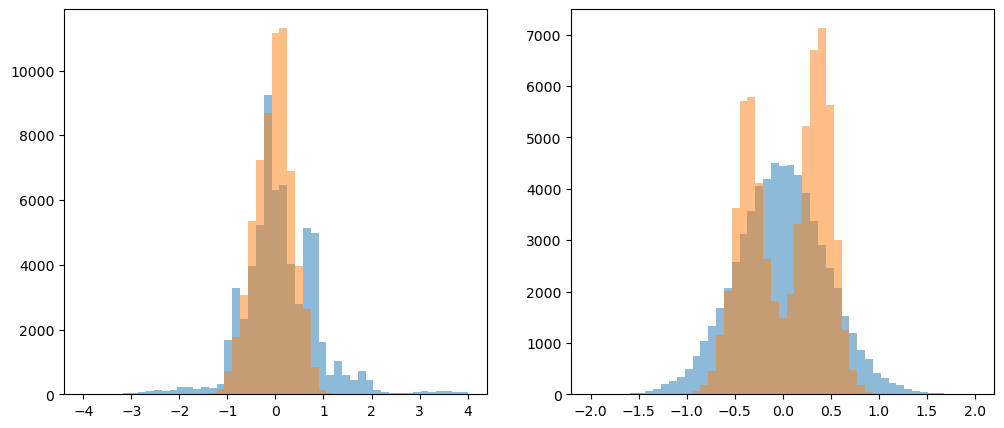

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axs = plt.subplots(1,2,figsize=(12, 5))
axs[0].hist(h1g.reshape(-1), alpha=0.5, bins=np.linspace(-4,4,50))
axs[0].hist(h2g.reshape(-1), alpha=0.5, bins=np.linspace(-4,4,50))
axs[1].hist(h1m.reshape(-1), alpha=0.5, bins=np.linspace(-2,2,50))
axs[1].hist(h2m.reshape(-1), alpha=0.5, bins=np.linspace(-2,2,50))

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE()
_g = tsne.fit_transform(np.vstack([h1g, h2g]))
tsne = TSNE()
_m = tsne.fit_transform(np.vstack([h1m, h2m]))

/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jhyang/anaconda3/envs/poly/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


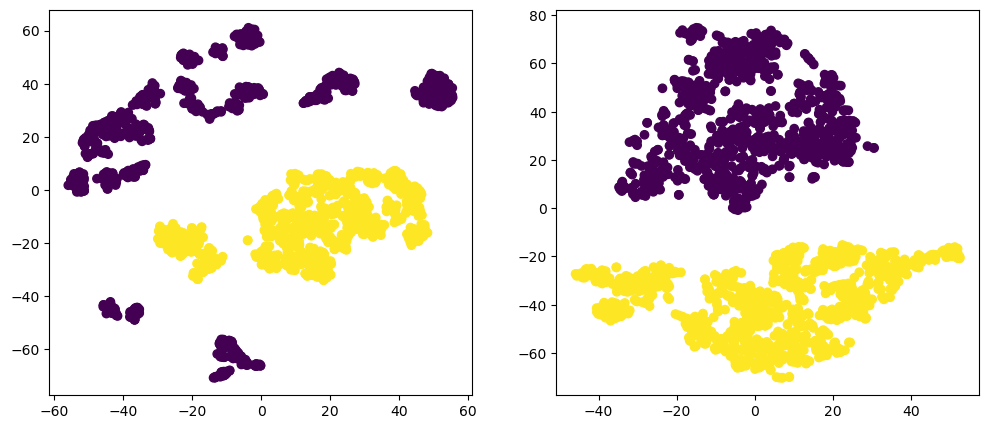

In [27]:
f, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].scatter(*_g.T, c=np.hstack([[0]*1000,[1]*1000]))
axs[1].scatter(*_m.T, c=np.hstack([[0]*1000,[1]*1000]))

In [41]:
model = SSIBEncoder(**encoder_params)
model.load('/home/jhyang/WORKSPACES/MODELS/fpoly/r42/encoders/ssib/tf_cv5_01_info', 
           'best.model.torch')
model.cuda()
model(**x)
model.scalars

{'MI/Z1Z2': tensor(-102.3214, device='cuda:0'),
 'MI/V1Z1': tensor(4.6387e-06, device='cuda:0'),
 'MI/V2Z2': tensor(1.5793e-06, device='cuda:0'),
 'Loss/MINE': tensor(108.2803, device='cuda:0'),
 'Loss/CLUBNet1': tensor(95.8269, device='cuda:0'),
 'Loss/CLUBNet2': tensor(-26.0508, device='cuda:0')}

In [1]:
from utils.dataset import MoleculeDataset, collate_fn, to_tensor
from utils.data import train_test_split, CrossValidation
from utils.trainer import SSIBTrainer
from utils.runner import run_ssib
from utils.params import Parameters
from model.models import SSIBEncoder
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters(root='./pt_params/', fn='ssib_tf.json')

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_qm9(path=p.data_path, col_target=p.target_column)

data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

set_random_state(p)

if p.cross_valid:
    k_fold = CrossValidation(train_data_, p.num_fold)
    p.num_repeat = p.num_fold

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
    'output_dim':64,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
    'output_dim':64
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params['output_dim'] = dataset.num_target

for n in range(p.num_repeat):
    gc.collect()
    torch.cuda.empty_cache()
    model_desc = f"{p.tag}_{n:02d}_info"
    path_model = os.path.join(p.output_path, f'r{p.random_state}/encoders/ssib/test_{model_desc}')
    if os.path.isdir(path_model): continue
    if p.cross_valid:
        train_data, valid_data = k_fold[n]
    else:
        train_data, valid_data = train_test_split(train_data_, train_ratio=1-p.valid_ratio)
    train_dl = DataLoader(train_data, batch_size=p.batch_size, shuffle=True, collate_fn=collate_fn)
    valid_dl = DataLoader(valid_data, batch_size=p.batch_size, collate_fn=collate_fn)
    test_dl  = DataLoader(test_data, batch_size=p.batch_size, collate_fn=collate_fn)

    model = SSIBEncoder(**encoder_params).to(p.device)
    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = SSIBTrainer(model=model, opt=opt)
    
    run_ssib(train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, trainer=trainer, 
             path=path_model, epochs=p.epochs, early_stop=p.early_stop, 
             logging_interval=p.logging_interval, 
             step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=True)

  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : tag
  Overwriting attribute : targets
  Overwriting attribute : cache_fn
           |      Train              |      Valid              |       Test
     Epoch |       Loss |         MI |       Loss |         MI |         MI
    1/ 5000 |      0.412 |      0.143 |     -0.028 |      0.552 |      0.550
    2/ 5000 |     -0.239 |      0.973 |     -0.285 |      0.897 |      0.916
    3/ 5000 |     -0.450 |      1.430 |     -0.291 |      1.163 |      1.169
    4/ 5000 |     -0.578 |      1.840 |     -0.656 |      2.121 |      2.157
    5/ 5000 |     -0.703 |      2.350 |     -0.755 |      2.543 |      2.566
    6/ 5000 |     -0.767 |      2.410 |     -0.320 |      1.513 | 
    7/ 5000 |     -0.554 |      2.071 |     -0.154 |      1.304 | 
    8/ 5000 |     -0.614 |      2.279 |     -0

KeyboardInterrupt: 

# Encoder loading test - IMax of MultiHeadModel

In [75]:
from utils.dataset import MoleculeDataset, fpoly_collate_fn, to_tensor
from utils.data import train_test_split, DataScaler, CrossValidation
from utils.trainer import Trainer
from utils.runner import run
from utils.params import Parameters
from model.models import MultiHeadModel
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters('concat_mult_add_cg.json', root='./params_info', default='defaults_s3_01.json')

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_fpoly(path=p.data_path, col_target=p.target_column)

data = to_tensor(dataset.data, device=p.device)
train_data_, test_data = train_test_split(data, train_ratio=p.train_ratio, seed=123)

set_random_state(p)

scaler = DataScaler(device=p.device)

if p.cross_valid:
    k_fold = CrossValidation(train_data_, p.num_fold)
    p.num_repeat = p.num_fold

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
})

p.decoder_params['output_dim'] = dataset.num_target

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}



  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


## parameter 비교

In [18]:
from model.models import MultiHeadModel
import numpy as np

In [21]:
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/finetune_3i/graph/imax_info_tf/02000.model.torch'
params = {
    "encoder_type": "graph",
    "encoder_params": {
        "graph_net_params": {
            "hidden_dim": 64,
            "output_dim": 64,
            "n_layer": 4,
            "graph": "tf",
            "node_dim": 26,
            "edge_dim": 5
        },
        "mol_net_params": {
            "hidden_dim": 128,
            "output_dim": 64,
            "n_layer": 2,
            "input_dim": 399
        }
    },
    "shared": False,
    "decoder_params": {
        "hidden_dim": 32,
        "n_layer": 2,
        "output_dim": 12,
        "input_dim": 64
    }
}

In [22]:
model = MultiHeadModel(**params)
sd_before = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/scratch_3i/graph/imax_info_tf/00100.model.torch'
model.load(fn, rebuild_model=True)
sd_init = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}
fn = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/scratch_3i/graph/imax_info_tf/02000.model.torch'
model.load(fn, rebuild_model=True)
sd_2k = {k:v.cpu().numpy().copy() for k,v in model.state_dict().items()}

In [23]:
output = {f'encoder_{x}':{'weight':[], 'bias':[]} for x in 'ABCDE'}
for k, v20 in sd_2k.items():
    if 'encoder' not in k: continue
    v01 = sd_init[k]
    vb = sd_before[k]
    encoder = k.split('.')[0]
    if 'weight' in k:
        wtyp = 'weight'
    elif 'bias' in k:
        wtyp = 'bias'
    else:
        continue
    output[encoder][wtyp].append(np.var(v20 - v01))

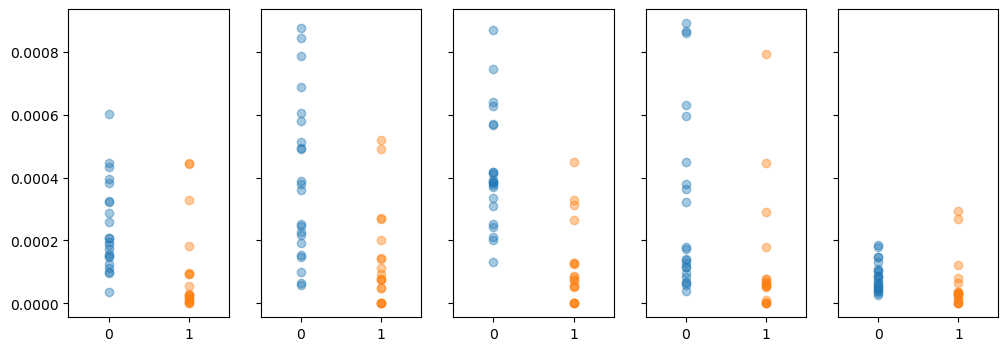

In [24]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1, 5, figsize=(12, 4), sharey=True)
for ax, v in zip(axs, output.values()):
    w = v['weight']
    b = v['bias']
    ax.scatter(np.zeros(len(w)), w, alpha=0.4)
    ax.scatter(np.ones(len(b)), b, alpha=0.4)
    ax.set_xlim([-0.5, 1.5])

In [25]:
for k,v in sd_2k.items():
    z = f'{k:60s}\t{str(v.shape):15s}'
    if k in sd_before.keys():
        vb = sd_before[k]
        z += f'\t{str(vb.shape):15s}'
    print(z)

encoder_A.graphnet.graph_embed.0.weight                     	(64, 26)       	(64, 26)       
encoder_A.graphnet.graph_embed.0.bias                       	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_key.weight    	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_key.bias      	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_query.weight  	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_query.bias    	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_value.weight  	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_value.bias    	(64,)          	(64,)          
encoder_A.graphnet.graph_network.module_0.lin_edge.weight   	(64, 5)        	(64, 5)        
encoder_A.graphnet.graph_network.module_0.lin_skip.weight   	(64, 64)       	(64, 64)       
encoder_A.graphnet.graph_network.module_0.lin_skip.bias     	(64,)    

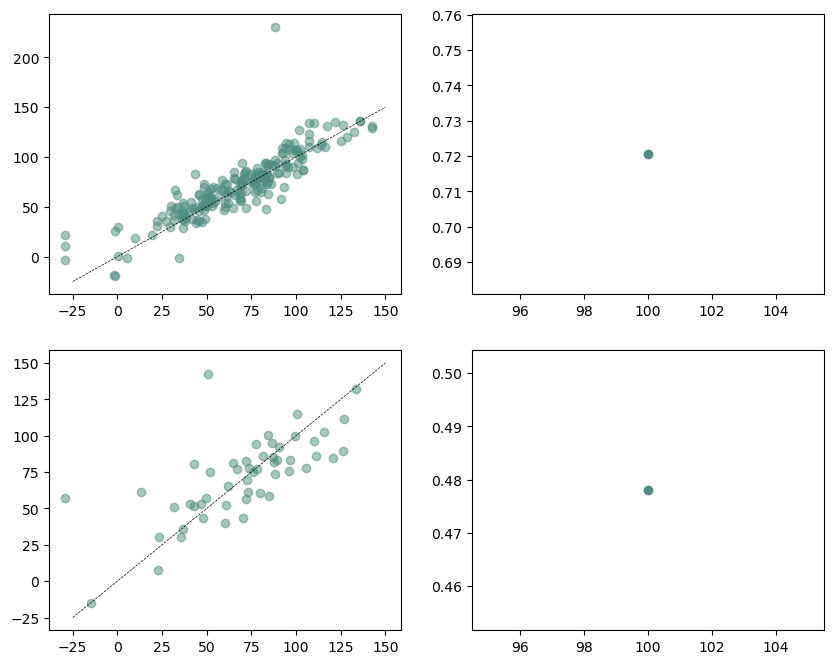

In [154]:
import pickle, os
from sklearn.metrics import r2_score

root = '/home/jhyang/WORKSPACES/MODELS/fpoly/r42/finetune_32/concat/mult_add_tf/'
f, ax = plt.subplots(2,2, figsize=(10, 8))
for i in range(20, 4000, 20):
    for j, dset in enumerate(['valid','test']):
        fn = os.path.join(root, f'{i:05d}.{dset}.pkl')
        if not os.path.isfile(fn): continue
        _info, _tgt, _pred = pickle.load(open(fn,'rb'))
        diff = (_tgt - _pred).reshape(-1)
        idxs = np.where(np.abs(diff) > 60)[0]
#        print(_info[idxs], diff[idxs].reshape(-1))
        color = [0.3, i/400+0.3, 1-i/200]
        ax[j, 0].scatter(_tgt, _pred, color=color, alpha=0.5)
        ax[j, 0].plot([-25,150],[-25,150],ls='--',color=[0,0,0],lw=0.5)
        ax[j, 1].scatter(i, r2_score(_tgt, _pred), color=color)
        if i == 200:
            idxs = idxs[np.argsort(diff[idxs])[::1]]
            for idx in idxs:
                ax[j,0].text(_tgt[idx], _pred[idx], s=f'{_info[idx]} : {diff[idx].item():8.2f}')
                
            

# speed test

In [2]:
from utils.dataset import MoleculeDataset, fpolyv2_collate_fn, to_tensor
from utils.data import DataScaler, CrossValidation
from utils.trainer import Trainer
from utils.runner import run
from utils.params import Parameters
from model.models import DualHeadModel
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters(fn='graph/mult_add_tf.json', 
               default='defaults_r100_n3c2i.json', 
               root='./params_ft')

set_random_state(p)

dataset = MoleculeDataset(norm=p.normalize_feature)
dataset.generate_fpolyv2(path=p.data_path, col_target=p.target_column)

data = to_tensor(dataset.data, device=p.device)
k_fold = CrossValidation(n_fold=p.num_fold, data=data, seed=p.random_state)
scaler = DataScaler(device=p.device)

p.graph_net_params.update({
    'node_dim':dataset.num_atom_feat,
    'edge_dim':dataset.num_bond_feat,
})

p.mol_net_params.update({
    'input_dim':dataset.num_mol_feat,
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params['output_dim'] = dataset.num_target

criterion = torch.nn.MSELoss()

gc.collect()
torch.cuda.empty_cache()
train_data, valid_data = k_fold[0]

set_random_state(p)
scaler.train(train_data)
        
scaled_train_data = scaler.scale_data(train_data)
scaled_valid_data = scaler.scale_data(valid_data)

train_dl = DataLoader(scaled_train_data, batch_size=p.batch_size, shuffle=True, collate_fn=fpolyv2_collate_fn)
valid_dl = DataLoader(scaled_valid_data, batch_size=512, collate_fn=fpoly_collate_fn)

model = DualHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, 
                        decoder_params=p.decoder_params, pooling=p.encoder_readout, 
                        shared=p.encoder_share)
    model.to(p.device)
    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = Trainer(model=model, opt=opt, scaler=scaler)

    run(train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, trainer=trainer, 
        path=f'./test/model/reproduce/{i:02d}', epochs=10, early_stop=p.early_stop, 
        relax_after=0, logging_interval=p.logging_interval, 
        step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=False)

train_data, valid_data = train_test_split(train_data_, train_ratio=0.8)

for i in range(2):
    gc.collect()
    torch.cuda.empty_cache()

    set_random_state(p)
    scaler.train(train_data)
        
    scaled_train_data = scaler.scale_data(train_data)
    scaled_valid_data = scaler.scale_data(valid_data)
    scaled_test_data = scaler.scale_data(test_data)

    train_dl = DataLoader(scaled_train_data, batch_size=p.batch_size, shuffle=True, collate_fn=fpoly_collate_fn)
    valid_dl = DataLoader(scaled_valid_data, batch_size=512, collate_fn=fpoly_collate_fn)
    test_dl  = DataLoader(scaled_test_data, batch_size=512, collate_fn=fpoly_collate_fn)

    model = MultiHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, 
                           decoder_params=p.decoder_params, pooling=p.encoder_readout, 
                           shared=p.encoder_share)
    model.to(p.device)
    opt = AdamW(model.parameters(), lr=p.learning_rate)
    trainer = Trainer(model=model, opt=opt, scaler=scaler)

    run(train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, trainer=trainer, 
        path=f'./test/model/reproduce/{i:02d}', epochs=10, early_stop=p.early_stop, 
        relax_after=0, logging_interval=p.logging_interval, 
        step_size=p.scheduler_step_size, gamma=p.scheduler_gamma, verbose=True)


  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn


..../test/model/reproduce/04: 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]


            |      Train           |      Valid           |    Test
      Epoch |       Loss |      R2 |       Loss |      R2 |      R2
---------------------------------------------------------------------------
    1/   10 | 0.36866356 |         | 5.04994345 | -32.089 |
    2/   10 | 0.18211798 |         | 2.77802896 | -17.203 |
    3/   10 | 0.14555994 |         | 0.47977969 |  -2.144 |
    4/   10 | 0.12994124 |         | 2.77699852 | -17.196 |
    5/   10 | 0.13381681 |         | 1.37921023 |  -8.037 |  -5.701
    6/   10 | 0.13209550 |         | 0.23650055 |  -0.550 |
    7/   10 | 0.12899698 |         | 0.20531134 |  -0.345 |
    8/   10 | 0.12054249 |         | 0.14705746 |   0.036 |
    9/   10 | 0.12063841 |         | 0.74660289 |  -3.892 |
   10/   10 | 0.13513183 |         | 0.14375784 |   0.058 |  -0.020
            |      Train           |      Valid           |    Test
      Epoch |       Loss |      R2 |       Loss |      R2 |      R2
------------------------------------

In [7]:
t, v = train_test_split(train_data_, train_ratio=0.9)
len(train_data_), len(test_data), len(t), len(v)

(264, 30, 237, 27)

In [8]:
feat, tgt, inf = fpoly_collate_fn(scaled_train_data)

In [21]:
model = MultiHeadModel(encoder_type=p.encoder_type, encoder_params=encoder_params, 
                    decoder_params=p.decoder_params, pooling=p.encoder_readout, 
                    shared=p.encoder_share).to(p.device)
h_A = model.encoder(**feat['mol_A'])
h_B = model.encoder(**feat['mol_B'])
h_C = model.encoder(**feat['mol_C'])
h_D = model.encoder(**feat['mol_D'])
h_E = model.encoder(**feat['mol_E'])


In [1]:
from utils.dataset import MoleculeDataset, fpolyv2_collate_fn, to_tensor
from utils.data import DataScaler, CrossValidation
from utils.trainer import Trainer
from utils.runner import run
from utils.params import Parameters
from model.models import DualHeadModel, DualHeadIMaxModel
import torch, gc, os
from torch.utils.data import DataLoader
from torch.optim import AdamW
import numpy as np
from argparse import ArgumentParser

def set_random_state(p):
    np.random.seed(p.random_state)
    torch.manual_seed(p.random_state)
    if p.device == 'cuda':
        torch.cuda.manual_seed(p.random_state)

p = Parameters(fn='graph_tf.json', 
               default='defaults_3i-1.json', 
               root='./params_pt')

set_random_state(p)

dataset0 = MoleculeDataset(norm=p.normalize_feature)
dataset0.generate_fpolyv2(path='./dataset/fpolymers_221123.c2.csv', col_target=['TG'])
data0 = to_tensor(dataset0.data, device=p.device)

dataset1 = MoleculeDataset(norm=p.normalize_feature)
dataset1.generate_fpolyv2(path='./dataset/screen_02.csv', col_target=p.target_column)

p.graph_net_params.update({
    'node_dim':dataset0.num_atom_feat,
    'edge_dim':dataset0.num_bond_feat,
})

p.mol_net_params.update({
    'input_dim':dataset0.num_mol_feat,
})

encoder_params = {
    'graph_net_params': p.graph_net_params,
    'mol_net_params': p.mol_net_params,
}

p.decoder_params['output_dim'] = dataset0.num_target

criterion = torch.nn.MSELoss()


  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn
  Setting new attribute : unique_data
  Overwriting attribute : norm
  Overwriting attribute : data
  Overwriting attribute : atom_feat_name
  Overwriting attribute : bond_feat_name
  Overwriting attribute : mol_feat_name
  Overwriting attribute : targets
  Overwriting attribute : tag
  Overwriting attribute : cache_fn
  Setting new attribute : unique_data


In [3]:
n = len(dataset1.data)
mask = np.zeros(n, dtype=bool)
mask[:int(n*0.1)] = True
np.random.shuffle(mask)

subset1 = to_tensor(dataset1.data[mask], p.device)
subset2 = []
for i in np.where(mask)[0]:
    sub = {k:v for k,v in dataset1.data[i].items()}
    w1 = [np.clip(f['weight'] + np.random.normal(0, 0.1), 0, 1) for f in sub['F']]
    w2 = [np.clip(f['weight'] + np.random.normal(0, 0.1), 0, 1) for f in sub['C']]
    w_sum = np.hstack(w1 + w2).sum()
    for i, w in enumerate(w1):
        sub['F'][i]['weight'] = w / w_sum
    for i, w in enumerate(w2):
        sub['C'][i]['weight'] = w / w_sum
    subset2.append(sub)
subset2 = to_tensor(subset2)
train_dl0 = DataLoader(data0, batch_size=32, shuffle=True, collate_fn=fpolyv2_collate_fn)
train_dl1 = DataLoader(subset1, batch_size=32, shuffle=True, collate_fn=fpolyv2_collate_fn)
train_dl2 = DataLoader(subset2, batch_size=32, shuffle=True, collate_fn=fpolyv2_collate_fn)
train_dl3 = DataLoader(data0.tolist() + subset1.tolist(), batch_size=32, shuffle=True, collate_fn=fpolyv2_collate_fn)
train_dl4 = DataLoader(data0.tolist() + subset2.tolist(), batch_size=32, shuffle=True, collate_fn=fpolyv2_collate_fn)

np.sum(mask)

22872

In [4]:
from model.base import BaseModel, MINE, CLUB
from model.models import GraphEncoder, MoleculeEncoder, ConcatEncoder, global_add_pool
from torch.optim import SGD, Adam, Adamax
import tqdm

class TestModel(BaseModel):
    def __init__(self, encoder_type, encoder_params, beta=1e-3, **kwargs):
        
        super(TestModel, self).__init__()

        self.shared = False
        self.beta = beta
        self._params = {
            'encoder_type':encoder_type,
            'encoder_params':encoder_params,
            'shared':False,
            'beta':beta,
        }
        
        if 'graph' in encoder_type.lower():
            self.encoder_A = GraphEncoder(**encoder_params)
            self.encoder_B = GraphEncoder(**encoder_params)
        elif 'mol' in encoder_type.lower():
            self.encoder_A = MoleculeEncoder(**encoder_params)
            self.encoder_B = MoleculeEncoder(**encoder_params)
        elif 'cat' in encoder_type.lower() or 'ssib' in encoder_type.lower():
            self.encoder_A = ConcatEncoder(**encoder_params)
            self.encoder_B = ConcatEncoder(**encoder_params)
        else:
            raise ValueError('not supported encoder type:', encoder_type)

        self.mine = MINE(self.encoder_A.output_dim * 4)
        self.club_A = CLUB(self.encoder_A.output_dim*2, self.encoder_B.output_dim*2)
        self.club_B = CLUB(self.encoder_A.output_dim*2, self.encoder_B.output_dim*2)

    def load_encoder(self, path:str, requires_grad=False, rebuild_model=False, verbose=False, **kwargs):
        self.encoder_A = self._load(self.encoder_A, path=path, requires_grad=requires_grad, 
                                    rebuild_model=rebuild_model, verbose=verbose, encoder_only=True, **kwargs)
        self.encoder_B = self._load(self.encoder_B, path=path, requires_grad=requires_grad, 
                                    rebuild_model=rebuild_model, verbose=verbose, encoder_only=True, **kwargs)
        return self

    def forward(self, feat_f, feat_c, batch_f, batch_c, **kwargs):
        w1 = feat_f['weight']
        w2 = feat_c['weight']
        h1 = self.encoder_A(**feat_f) * (w1 != 0).long()
        h2 = self.encoder_B(**feat_c) * (w2 != 0).long()
        
        h1 = torch.hstack([global_add_pool(h1, batch_f), global_add_pool(h1*w1, batch_f)])
        h2 = torch.hstack([global_add_pool(h2, batch_c), global_add_pool(h2*w2, batch_c)])

        h = h1 + h2
        v = h.mean(dim=0).expand_as(h)
#        n1 = h1.shape[0]
#        n2 = h2.shape[0]
#        n = np.max([n1, n2])
#        pad = torch.zeros_like(torch.vstack([h1, h2]))
#
#        h1 = torch.vstack([h1, pad[:n-n1]])
#        h2 = torch.vstack([h2, pad[:n-n2]])
        
        v1 = h1.mean(dim=0).expand_as(h1)
        v2 = h2.mean(dim=0).expand_as(h2)

        self.mi_h1h2 = self.mine(h1, h2)
        self.mi_v1h1 = self.club_A(h1, v1)
        self.mi_v2h2 = self.club_B(h2, v2)
        
        return self.mi_h1h2
        
    @property
    def loss(self):
        return self.mine.loss + self.beta * (self.club_A.loss + self.club_B.loss)

    @property
    def scalars(self):
        return {
            'MI/MINE': self.mi_h1h2,  'Loss/MINE': self.mine.loss,
            'MI/CLUB_A': self.mi_v1h1,  'Loss/CLUB_A': self.club_A.loss * self.beta,
            'MI/CLUB_B': self.mi_v2h2,  'Loss/CLUB_B': self.club_B.loss * self.beta,
        }

def execute(dl, epochs=50):
    model = TestModel(encoder_type=p.encoder_type, encoder_params=encoder_params, 
                      decoder_params=p.decoder_params, beta=0.001)

    model.to('cuda')
    opt = AdamW(model.parameters(), lr=1e-3)
    model.train()
    output = {'loss':[],'mi':[],'scalars':{}}
    for i in tqdm.tqdm(range(epochs)):
        mis = []
        ls  = []
        scs = {}
        for feat, tgt, ids in dl:
            mi = model(**feat)
            loss = model.loss
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
            mis.append(mi.detach().cpu().numpy())
            ls.append(loss.detach().cpu().numpy())
            for k, v in model.scalars.items():
                if k not in scs.keys():
                    scs[k] = v.detach().cpu().numpy()
                else:
                    scs[k] = np.vstack([scs[k], v.detach().cpu().numpy()])
                    
        output['loss'].append(np.array(ls))
        output['mi'].append(np.array(mis))
        for k, v in scs.items():
            if k not in output['scalars'].items():
                output['scalars'][k] = [np.array(v)]
            else:
                output['scalars'][k].append(np.array(v))
    return output


In [5]:
binfo = {}
#r = 0.1
for bs in [32, 64, 128, 256, 512]:
    train_dlx = DataLoader(subset2, batch_size=bs, shuffle=True, collate_fn=fpolyv2_collate_fn)

  #  set_random_state(p)
#    np.random.seed(seed)
#    mask = np.zeros(n, dtype=bool)
#    mask[:int(n*r)] = True
#    np.random.shuffle(mask)
#    subset = data[mask]
    binfo[bs] = execute(train_dlx, 50)
#info6 = execute(train_dl4)

100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Text(0.5, 0, 'Epochs')

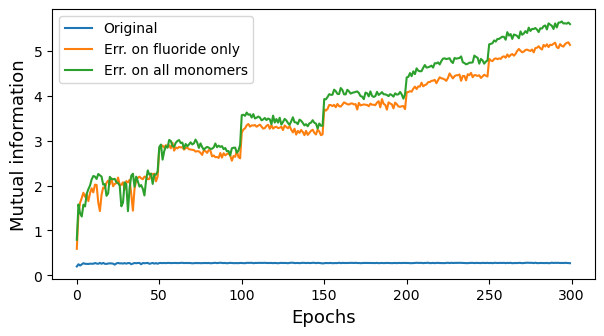

In [43]:
import pandas as pd
d1 = pd.read_csv('./dataset/1_graph_tf.csv')
d2 = pd.read_csv('./dataset/2_graph_tf.csv')
d3 = pd.read_csv('./dataset/3_graph_tf.csv')
v1 = d1.Value.values
v2 = d2.Value.values
v3 = d3.Value.values

f, ax = plt.subplots(1,1,figsize=(7,3.5))
ax.plot(v1, label='Original')
ax.plot(v3, label='Err. on fluoride only')
ax.plot(v2, label='Err. on all monomers')
ax.legend(loc='upper left')
ax.set_ylabel('Mutual information', fontsize=13)
ax.set_xlabel('Epochs', fontsize=13)

In [15]:
oinfo = {}
for i in [0,1,2,3,4]:
    oinfo[i] = eval(f'execute(train_dl{i}, 100)')

100%|██████████| 100/100 [06:34<00:00,  3.95s/it]


In [19]:
oinfo['1-r'] = execute(train_dl1, 50)
oinfo['2-r'] = execute(train_dl2, 50)

100%|██████████| 50/50 [03:15<00:00,  3.90s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


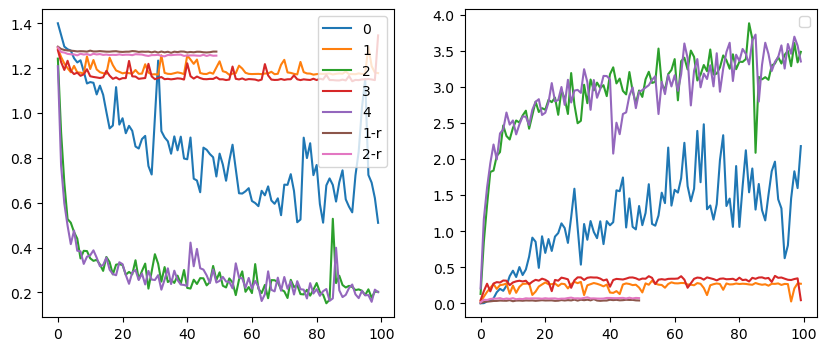

In [20]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1,2,figsize=(10,4))

for k, info in oinfo.items():
    l1 = np.mean(info['loss'], axis=1)
    l2 = np.std(info['loss'], axis=1)
    l3 = np.mean(info['mi'], axis=1)
    l4 = np.std(info['mi'], axis=1)
    x = np.arange(len(l1))

    axs[0].plot(x, l1, label=k)
#    axs[0].fill_between(x, l1-l2, l1+l2, alpha=0.3)
    axs[1].plot(x, l3)
#    axs[1].fill_between(x, l3-l4, l3+l4, alpha=0.3)
#for ax in axs: ax.set_xlim([-10,100])
for ax in axs: ax.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


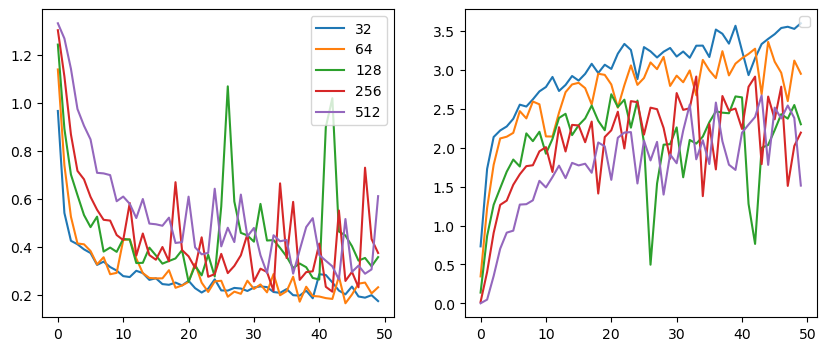

: 

In [6]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1,2,figsize=(10,4))

for k, info in binfo.items():
    l1 = np.mean(info['loss'], axis=1)
    l2 = np.std(info['loss'], axis=1)
    l3 = np.mean(info['mi'], axis=1)
    l4 = np.std(info['mi'], axis=1)
    x = np.arange(len(l1))

    axs[0].plot(x, l1, label=k)
#    axs[0].fill_between(x, l1-l2, l1+l2, alpha=0.3)
    axs[1].plot(x, l3)
#    axs[1].fill_between(x, l3-l4, l3+l4, alpha=0.3)
#for ax in axs: ax.set_xlim([-10,100])
for ax in axs: ax.legend(loc='upper right')

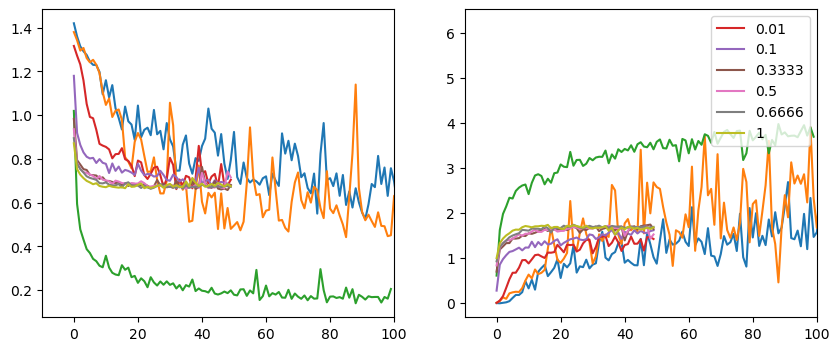

In [174]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(1,2,figsize=(10,4))

for info in [info0, info1, info4]:
    l1 = np.mean(info['loss'], axis=1)
    x = np.arange(len(l1))
    l2 = np.std(info['loss'], axis=1)
    l3 = np.mean(info['mi'], axis=1)
    l4 = np.std(info['mi'], axis=1)

    axs[0].plot(x, l1)
#    axs[0].fill_between(x, l1-l2, l1+l2, alpha=0.3)
    axs[1].plot(x, l3)
#    axs[1].fill_between(x, l3-l4, l3+l4, alpha=0.3)
for k, info in infos.items():
    l1 = np.mean(info['loss'], axis=1)
    x = np.arange(len(l1))
    l2 = np.std(info['loss'], axis=1)
    l3 = np.mean(info['mi'], axis=1)
    l4 = np.std(info['mi'], axis=1)
    axs[0].plot(x, l1, label=k)
#    axs[0].fill_between(x, l1-l2, l1+l2, alpha=0.3)
    axs[1].plot(x, l3, label=k)
#    axs[1].fill_between(x, l3-l4, l3+l4, alpha=0.3)
axs[1].legend(loc='upper right')
for ax in axs: ax.set_xlim([-10,100])